<a href="https://colab.research.google.com/github/aaditkamat/analytics-projects/blob/main/Credit_Card_Applicants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('CreditCard.csv')
data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


# Data Preparation

In [9]:
# Create dummy variables for categorical columns
transformed_data = pd.get_dummies(data, drop_first=True)
transformed_data.head()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
0,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,1,1,0
1,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,1,0,0
2,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,1,1,0
3,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,1,0,0
4,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,1,1,0


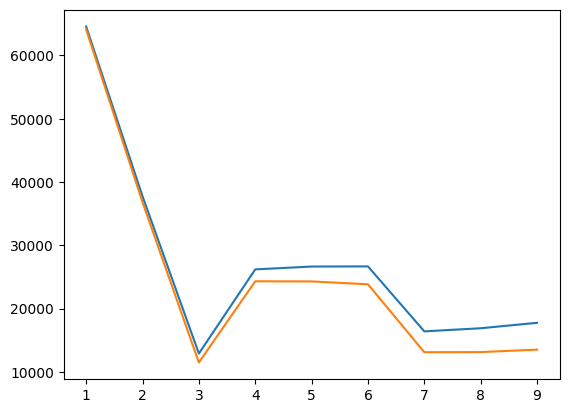

In [10]:
# Finding the optimal number of clusters
no_of_clusters = range(1, 10)
models = [GaussianMixture(n, random_state=42).fit(transformed_data) for n in no_of_clusters]
plt.plot(no_of_clusters, [m.bic(transformed_data) for m in models])
plt.plot(no_of_clusters, [m.aic(transformed_data) for m in models])

In [11]:
best_model = GaussianMixture(3, random_state=42)

# Interpretation

In [12]:
clusters = best_model.fit(transformed_data).predict(transformed_data)

In [13]:
transformed_data['cluster'] = clusters
transformed_data.head()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes,cluster
0,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,1,1,0,1
1,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,1,0,0,1
2,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,1,1,0,1
3,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,1,0,0,1
4,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,1,1,0,1


In [14]:
transformed_data['cluster'].value_counts()

1    720
2    303
0    296
Name: cluster, dtype: int64

In [16]:
best_model.means_.shape

(3, 12)

In [19]:
clustered_data = pd.DataFrame(columns=transformed_data.columns[:-1], data=best_model.means_)
clustered_data

,reports,age,income,share,expenditure,dependents,months,majorcards,active,card_yes,owner_yes,selfemp_yes
0,1.587838,33.202984,3.068509,0.000477,0.000000,1.077703,55.300676,0.739865,6.054054,0.0,0.304054,0.094595
1,0.000000,32.503472,3.409851,0.088563,236.916958,0.951389,49.895833,1.000000,7.223611,1.0,0.469444,0.000000
2,0.435644,34.909241,3.549702,0.088288,242.607480,1.013201,68.000000,0.458746,7.379538,1.0,0.504950,0.207921


In [ ]:
# Cluster 0: Non-Credit Users
# Cluster 1: Young Employees
# Cluster 2: Successful Entrepreneurs
# Just a sample, the clusters could be interpreted in other ways